<a href="https://colab.research.google.com/github/dusrbrla-mbb/kubig-portfolio/blob/temp/ml_exe_sensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/Study/Jupyter'
df = pd.read_csv(path + '/' + 'FD001_01.csv')
print(df.shape)
df.head()

Mounted at /content/drive
(20631, 26)


,unit,cycle,op_1,op_2,op_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


### Business Understanding
##### 해당 분야 이해 단계
* 2차 산업군에서 관심있어 하는 것은 무엇인가?
* 스마트 팩토리 분야의 관심사 3가지 - VM, APC, PHM
* VM - Virtual Metrology(가상 계측)
* APC - Automatic Process Control
* PHM - Prognostics and Health Management

### Virtual Metrology
##### 가상계측 - 실제 측정 대신 가상으로 측정, soft-sensor 라고도 함.
* 재료가 공장의 설비에 들어갔다 나오면 이 과정을 공정(Process)이라 합니다.
* 예를 들어, 1m 짜리 쇠 막대기를 만드는 공장에서 1m로 자르는 공정.
* 1m 로 자른다고 잘랐는데 오차가 있을 것이고, 이는 측정을 통해 알 수 있습니다.
* 공정이 잘 됬는지 측정하는 것을 계측(Metrology)이라 합니다.
* 공정설비 안에서 일어나는 일을 센서로 데이터 획득(feature)
* 공정 이후 계측 단계에서 결과 데이터 획득(label)
* 한 제품(재료)당 한 row 만들고, 제품 100만개에 대해 데이터 수집하면?
* 100만 row 짜리 데이터 셋 완성 -> 지도학습 가능.
* 계측 대상을 줄일수록 생산성이 증가하므로, 이를 극단적으로 줄일 수 있게
* (계측 설비 대신 머신러닝 알고리즘으로 계측값을 유추)

#### 참고.
계측은 파괴 검사와 비파괴 검사로 나뉘는데, 파괴 검사는 상품이 망가지므로 최대한 하지 않아야 함.  
비파괴 검사도 적을수록 생산성 향상에 유리하므로,  

**Virtual Metrology : 가상의 환경(예측)으로 대체**  
-> 기존의 사례(IoT, 센서 多)를 통해 공정 과정을 feature, 계측 결과를 label 로 하여 관계를 학습  
-> 대부분의 상황에서는 계측을 건너뛰어 예측 결과로 대체하지만,  
일부 오차가 많이 발생하는 상황을 feature - label 관계로 파악하여, 샘플링 비율을 최소화한다.  

앞으로 대다수의 기업에서, 생산단가 측면에서 많이 도입할 것이나,  
센서가 많이 필요하기 때문에 비용이 많이 필요함(장비가 많거나 비싸면 상대적으로 용이).

prognostic : 증상 X
diagnostic : 증상 有

### APC 는 따로 정리하지 않음.

#### 참고.
재료 -> Process(공정, 기계 사용) -> Metrology(계측, 기계 사용) -> 상품  
철판 ->         자른다        ->        1m 인가?        -> 철사

이때 계측에는 어려움이 있는데,  
재료의 상태, 공정 설비의 노후화 등으로 정확한 계측이 어려울 수 있기 때문에,  

**APC : 과정을 자동화**하여 외부 변수의 개입을 줄임 -> **인공지능보다는 기계공학의 영역**

만약 100만개의 공정을 돌렸다면, 전수 조사시 100만번의 계측이 이루어져야 하므로, 생산 시간이 늘어져 효율 떨어짐.  
샘플링 비율 역시 품질 측면에서는 높아야 하지만, 생산성 측면에서는 줄여야 하므로, 타협.

### PHM - Prognostics and Health Management
##### 설비 예방보전 - 고장나기 이전에 미리 알고 싶어요

#### 참고.
담당자 인지 -> 엔지니어 호출 -> 입실 -> 문제 파악 -> 즉시 해결 가능한가(불가능한 경우는 대부분 부품 요청 필요)

이때 부품 요청해서 받는 시간까지 1 ~ 3주 정도 걸리는데,  
잔존 수명을 알고 있다면 미리 부품 수요를 대처할 수 있어 즉시 해결 가능하게 변환 가능.  
이를 상품 수리가 아닌 공장 가동에 적용하면,

**PHM : 잔존 수명을 파악**했다면 공장의 가동률을 높일 수 있음.

uptime + downtime(scheduled / unscheduled)

이때 정기 점검(scheduled) 시, 어차피 일부 장비의 가동이 멈추므로, 잔존 수명을 미리 알고 있다면,  
수주 내에 고장날 부품을 미리 교체하여 장기적인 가동률이 높아짐.

* 데이터 셋 설명(nasa coe repository)

Data Set: FD001
Train trjectories: 100
Test trajectories: 100
Conditions: Sea Level
Fault Modes:  HPC Degradation


Experimental Scenario

Data sets consists of multiple multivariate time series. 
Each data set is further divided into training and test subsets. 
Each time series is from a different engine ?i.e., the data can be considered to be from a fleet of engines of the same type. 
Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. 
This wear and variation is considered normal, i.e., it is not considered a fault condition. 
There are three operational settings that have a substantial effect on engine performance. 
These settings are also included in the data. The data is contaminated with sensor noise.

The engine is operating normally at the start of each time series, and develops a fault at some point during the series. 
In the training set, the fault grows in magnitude until system failure. 
In the test set, the time series ends some time prior to system failure. 
The objective is to predict the number of remaining operational cycles before failure in the test set, 
i.e., the number of operational cycles after the last cycle that the engine will continue to operate. 

The data are provided as a zip-compressed text file with 26 columns of numbers, separated by spaces. 
Each row is a snapshot of data taken during a single operational cycle, each column is a different variable. 

The columns correspond to:
1)   unit number
2)   time, in cycles
3)   operational setting 1
4)   operational setting 2
5)   operational setting 3
6)   sensor measurement  1
7)   sensor measurement  2
...
26)   sensor measurement  21


Reference: A. Saxena, K. Goebel, D. Simon, and N. Eklund, Damage Propagation Modeling for Aircraft Engine Run-to-Failure Simulation? in the Proceedings of the Ist International Conference on Prognostics and Health Management (PHM08), Denver CO, Oct 2008.

##### 컬럼(센서) 설명 -> 지금 상태에서 분석하는 것은 비효율. filter 방식을 적용하면 무효한 경우 多.
* unit - 엔진 번호 -> 모든 unit은 새 엔진으로 시작한 것이 아닙니다.
* cycle - 몇 번째 사용한 것인가 -> 2 는 1 대비 한 번 더 사용하였음
* op_no_1~3 -> 동작 모드이고, 현재 사용하지 않을 컬럼입니다.
* T2 - 엔진으로 들어가는 공기 온도
* T24 - LPC 밖으로 나가는 공기 온도
* T30 - HPC 밖으로 나가는 공기 온도
* T50 - LPT 밖으로 나가는 공기 온도
* P2 - 엔진으로 들어가는 공기 압력
* P15 - bypass-duct 라는 곳의 공기 압력
* P30 - HPC 밖으로 나가는 공기 압력
* Ps30 - HPC 밖으로 나가는 공기 압력(P30과 유사)
* Nf - fan(날개)의 회전 속도 -> 이론
* NRf - fan(날개)의 회전 속도 -> 실제
* Nf_dmd - 실제 필요한 fan(날개)의 회전 속도 -> 이론
* PCNfR_dmd - 실제 필요한 fan(날개)의 회전 속도 -> 실제
* Nc - core(엔진 내부)의 회전 속도 -> 이론
* NRc - core(엔진 내부)의 회전 속도 -> 실제
* epr - 엔진 내부 공기압 비율
* Phi - HPC 로 유입되는 연료의 비율
* BPR - 전체 공기 양 대비 bypass-duct 로 빠지는 공기의 비율
* htBleed - Bleed Enthalpy 라는 수치
* W31 - HPT 부품으로 들어가는 냉각수의 손실률
* W32 - LPT 부품으로 들어가는 냉각수의 손실률

### 데이터 이해 단계
##### EZ하게 판다스 프로파일링 적용.

In [ ]:
import pandas_profiling as pp
report = pp.ProfileReport(df)
report.to_file('report.html')
# 대용량 데이터의 경우, 용량을 줄여야 함.

### 센서 데이터의 특징
##### 모 아니면 도
* 위치 + 종류 + 획득속도 -> 특정 위치 + 종류의 조합이 맞아야 의미 O
* 대부분의 센서가 무의미할 가능성 존재
* 표준편차가 0 에 가까울 여지가 있다. -> 필터 방식으로 제거.

In [ ]:
desc_t = df.describe().T
desc_t.loc[desc_t['std'] <= 0.01]
# 표준편차 낮은 것을 무시하고 넘어가면 안 되는 경우가 간혹 존재
# 값의 크기가 작을수록 의미가 큰 경우에는 필터로 지우면 안됨.
# 진공 센서의 경우, 숫자가 작을수록 큰 의미를 갖습니다.

,count,mean,std,min,25%,50%,75%,max
op_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.00,0.0015,0.0087
op_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.00,0.0003,0.0006
op_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.00,100.0000,100.0000
T2,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.67,518.6700,518.6700
P2,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.62,14.6200,14.6200
P15,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.61,21.6100,21.6100
epr,20631.0,1.300000,4.660829e-13,1.3000,1.3000,1.30,1.3000,1.3000
farB,20631.0,0.030000,1.556432e-14,0.0300,0.0300,0.03,0.0300,0.0300
Nf_dmd,20631.0,2388.000000,0.000000e+00,2388.0000,2388.0000,2388.00,2388.0000,2388.0000
PCNfR_dmd,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.00,100.0000,100.0000


### 데이터 탐색
##### 설비 예방보전 - 고장나기 전에 미리 알고 싶어요?!
* 컬럼간 관계를 시각화 할 때, 분석 방향성과 일치해야 합니다.

<AxesSubplot:xlabel='cycle', ylabel='P30'>

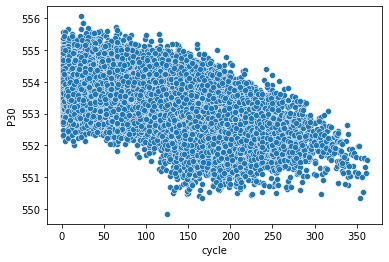

In [ ]:
# 특정 엔진은 선택했을 때(unit 하나로 고정),
# cycle 최댓값이 만약 100 이었다면, 해당 엔진은 101번째 사용했을 때 고장난 것.
import seaborn as sns
sns.scatterplot(data=df, x='cycle', y='P30') # 엔진 100개? 전체

<AxesSubplot:xlabel='cycle', ylabel='P30'>

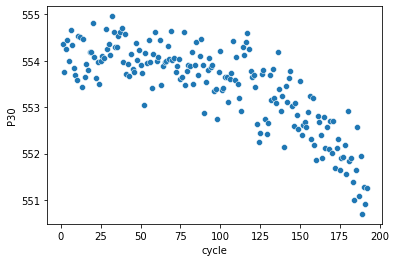

In [ ]:
sns.scatterplot(data=df.loc[df['unit'] == 1], x='cycle', y='P30') # 엔진 1개만
# 이외에도 y축을 다른 센서로 변화시켜 보기 -> 센서(IoT)를 활용하여 관계 유추하는 것은 PHM의 특징

### 잔존 수명이라는 키워드를 이용해 cycle 컬럼 생각해보기.
* 일단 cycle 컬럼은 잔존 수명을 의미하지 않음 -> 엔진마다 고장나는 횟수(기준점)가 다름 -> label 로 두면 분석 방향성과 어긋남.
* x축을 cycle, y축(label)을 센서로 두지 않고 반대로 두면 어떻게 될까?

In [ ]:
import numpy as np
df.groupby('unit').agg({'cycle' : np.max})

,cycle
unit,
1,192
2,287
3,179
4,189
5,269
...,...
96,336
97,202
98,156


In [ ]:
df.head()

,unit,cycle,op_1,op_2,op_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


### RUL(Remaining Useful Life)
##### 잔존수명 컬럼을 새로 만들어 줍니다.
* 각 unit 마다 최대 cycle 이 서로 다름을 반영합니다.
* 서로 다른 엔진에서 cycle 값이 같을 때, 잔존수명이 같지 않습니다.
* 이를 RUL 컬럼을 만들어 RUL 값이 같을 때 잔존수명이 같게 만들어줍니다.

In [ ]:
unit = 1
one_unit = df.loc[df['unit'] == unit]
cy_max = one_unit['cycle'].max()
one_unit['RUL'] = cy_max - one_unit['cycle'] + 1   # 최솟값 기준, 1회를 더 쓰고 고장났다는 의미를 강조하기 위해 1을 더함.
one_unit.head()

<ipython-input-9-73347a1d4f70>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_unit['RUL'] = cy_max - one_unit['cycle'] + 1   # 최솟값 기준, 1회를 더 쓰고 고장났다는 의미를 강조하기 위해 1을 더함.


,unit,cycle,op_1,op_2,op_3,T2,T24,T30,T50,P2,...,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,191
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,190
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,189
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,188


In [ ]:
rul_df = pd.DataFrame()
for i in range(100):
    one_unit = df.loc[df['unit'] == i + 1]
    cy_max = one_unit['cycle'].max()
    one_unit['RUL'] = cy_max - one_unit['cycle'] + 1
    rul_df = pd.concat([rul_df, one_unit])
print(rul_df.shape)

<ipython-input-10-2ceb64a8583e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_unit['RUL'] = cy_max - one_unit['cycle'] + 1
<ipython-input-10-2ceb64a8583e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_unit['RUL'] = cy_max - one_unit['cycle'] + 1
<ipython-input-10-2ceb64a8583e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

<ipython-input-10-2ceb64a8583e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_unit['RUL'] = cy_max - one_unit['cycle'] + 1
<ipython-input-10-2ceb64a8583e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_unit['RUL'] = cy_max - one_unit['cycle'] + 1
<ipython-input-10-2ceb64a8583e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

<ipython-input-10-2ceb64a8583e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_unit['RUL'] = cy_max - one_unit['cycle'] + 1
<ipython-input-10-2ceb64a8583e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_unit['RUL'] = cy_max - one_unit['cycle'] + 1
<ipython-input-10-2ceb64a8583e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

<ipython-input-10-2ceb64a8583e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_unit['RUL'] = cy_max - one_unit['cycle'] + 1
<ipython-input-10-2ceb64a8583e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_unit['RUL'] = cy_max - one_unit['cycle'] + 1
<ipython-input-10-2ceb64a8583e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

(20631, 27)


<ipython-input-10-2ceb64a8583e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_unit['RUL'] = cy_max - one_unit['cycle'] + 1
<ipython-input-10-2ceb64a8583e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_unit['RUL'] = cy_max - one_unit['cycle'] + 1
<ipython-input-10-2ceb64a8583e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

<AxesSubplot:xlabel='RUL', ylabel='Ps30'>

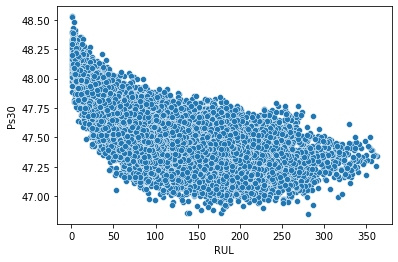

In [ ]:
import seaborn as sns
sns.scatterplot(data=rul_df, x='RUL', y='Ps30')

<AxesSubplot:xlabel='RUL', ylabel='Ps30'>

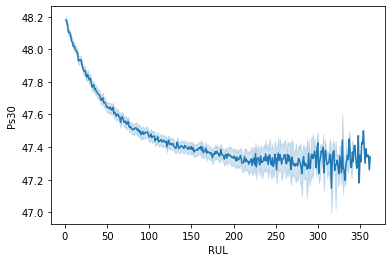

In [ ]:
sns.lineplot(data=rul_df, x='RUL', y='Ps30')

<AxesSubplot:xlabel='RUL', ylabel='P30'>

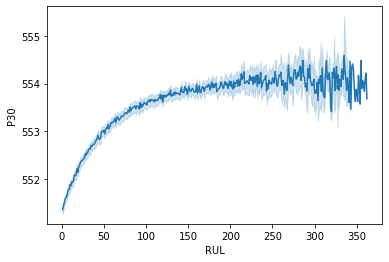

In [ ]:
sns.lineplot(data=rul_df, x='RUL', y='P30')

In [ ]:
desc_t = rul_df.describe().T
desc_t.loc[desc_t['std'] >= 0.01].T.columns
# unit 은 새로운 데이터를 대입할 때, 값을 넣을 수 없기 때문에,
# cycle 은 RUL 컬럼을 만들 때, 이미 사용했기 때문에,
# feature 로 사용하지 않는다.

Index(['unit', 'cycle', 'T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30', 'phi',
       'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32', 'RUL'],
      dtype='object')

In [ ]:
features = ['T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30', 'phi',
       'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32']  # 센서들만 포함
label = 'RUL'
train, test = rul_df[0::2], rul_df[1::2]
train, test = train.reset_index(), test.reset_index()
X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

### 모델 기획 및 수립
##### 가장 인기있는(성능 좋은) 지도학습 알고리즘들:
* XGBoost, CatBoost, LightGBM
* GBDT(Gradient Boosted Decision Tree) 계열 알고리즘
* !pip install xgboost catboost lightgbm

### 3 개의 알고리즘 이해를 위한 배경지식:
##### Decision Tree -> RandomForest(Bagging) -> GBDT(Boosting)
* DT & RF 는 링크 참조 https://passionpython.tistory.com/61
* GBDT(Boosting) 는 **Boost_알고리즘.pdf** 참조

In [ ]:
!pip install xgboost catboost lightgbm
# 다음 시간에 rul_df 를 조금 더 변환하면 feature - label 관계가 더 명확해짐.
# 컬럼 소개에 있었던 그림은 마지막 시간에 다시 확인.

수업 이후, 학위는 다른 이야기이지만,  
자격증과 경진대회 등 취업을 목표로 한다면,  
https://kr.linkedin.com/  
https://www.saramin.co.kr/zf_user/  
에 들어가 구인 공고와 요구 조건을 확인하며 보완한다.

In [ ]:
rul_df.head()

,unit,cycle,op_1,op_2,op_3,T2,T24,T30,T50,P2,...,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,191
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,190
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,189
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,188


### XGBoost - 2016
##### eXtreme Gradient Boosting
* 내부적으로 병렬연산이 가능하게 부스팅 구조 개선(본래는 불가).
* 과적합 방지용 *Regularizer* 가 강하게 들어있음 -> L1, L2 는 train 점수 하락 / test 점수 상승 기대
* **CatBoost, LightGBM 대비 래퍼런스가 많아** 선택 -> 역사가 조금 더 길기 때문에, 관련 자료가 많음
* 일반인 그룹(Contributor) 이 만든 것.
* 정확도 최우선, 속도는 병렬연산에 의해 올릴 수 있는 여지가 있음.

자세한 내용은 **xgboost.pdf** 참고.

##### 배깅과 부스팅의 차이 -  병렬연산
* 배깅인 랜덤포레스트의 경우, 데이터 셋이 붓스트랩을 활용해 100개가 존재한다고 가정시,  
100개 데이터 셋에 대해 따로 따로 학습 가능 -> 병렬연산!
* 반면에 부스팅은 한 데이터 셋으로 n개의 모델이 순차적으로 학습 -> 병렬연산 불가!

##### Regularizer - 패널티 항, 제약, 일반화를 위함, 과적합 방지용
* 과적합(over-fitting) 줄이기 위한 접근법 중 하나.
* 일반화 - train 점수와 test 점수가 유사함을 의미.
* 선형회귀 알고리즘에서는 L1 을 Lasso, L2 를 Ridge, L1+L2 를 ElasticNet 이라 함.
* L1 은 feature selection 과 유사하게 동작(특정 feature 를 안 씀)
* L2 는 알고리즘 내부에서 feature 사용 비중을 고르게 바꿈.
* 수식상 절댓값이 있으면 L1, 제곱이 있으면 L2.

참고로 feature - label 관계를 유효하게 만드는 방법은  
1) feature selection  
2) Regularizer.

In [ ]:
from xgboost import XGBClassifier as xg
xg() # 괄호 뒤에서 Shift + Tab 눌러서 옵션 확인.

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

### LightGBM - 2017
##### XGBoost 의 경량화(?) 버전
* 사기업인 마이크로소프트에서 만든 것.
* XGBoost 의 단점이었던 '시간이 오래 걸리는 것' 보완 -> 속도 약간 향상
* 정확도를 약간 내려놓았기 때문에, 정확도가 많이 떨어질 때에는 XGBoost 활용.
* **데이터 셋의 용량이 크거나 컴퓨터 사양이 떨어질 때** 선택.

자세한 내용은 **lightgbm.pdf** 참고.

### CatBoost - 2018
##### Categorical Feature 처리에 특화된 XGBoost 개선판
* 속도 상당히 느림, 디폴트 값 튜닝이 잘 되어있음 -> 하이퍼파라미터 튜닝 필요성 少
* 사기업인 러시아 그룹 Yandex 라는 곳에서 만듦.
* **경우의 수 컬럼이 많을 때** 선택.

자세한 내용은 **catboost.pdf** 참고.

일반적인 데이터 프레임 형태의 데이터 셋을 처리할 때, 가장 정확도가 높은 알고리즘 3개.  
이 방면에서 딥러닝은 정확도가 떨어져, RandomForest 에 비해서도 정확도가 떨어질 때도 존재.

In [ ]:
from sklearn.ensemble import RandomForestRegressor as rf
from xgboost import XGBRegressor as xg
from lightgbm import LGBMRegressor as lg
from catboost import CatBoostRegressor as cb
m1, m2, m3, m4 = rf(), xg(), lg(), cb(silent=True) # 옵션을 설정하면 하단의 설명 제거 가능.
m1.fit(X_train, y_train) # 위에서 train / test split 함.
m2.fit(X_train, y_train)
m3.fit(X_train, y_train)
m4.fit(X_train, y_train)

In [ ]:
print(m1.score(X_test, y_test))
print(m2.score(X_test, y_test))
print(m3.score(X_test, y_test))
print(m4.score(X_test, y_test))
# 옵션을 디폴트 값으로 설정했을 때는, RandomForest 의 점수가 상당히 좋은 편.
# 단, RandomForest 는 하이퍼파라미터 튜닝을 했을 때 크게 바뀌지 않기 때문에,
# GBDT 계열 알고리즘이 더 좋아짐.

0.628232109080423
0.590061925041379
0.6274747881162159
0.6273565169048241


<AxesSubplot:xlabel='RUL', ylabel='P30'>

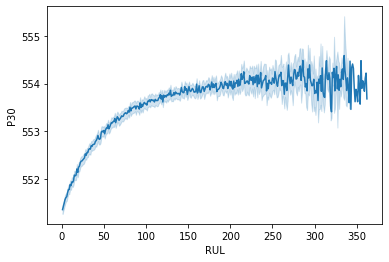

In [ ]:
sns.lineplot(data=rul_df, x='RUL', y='P30')

In [ ]:
pa = 100
pb = pa + 1
print(pb - pa)
print(np.log(pb) - np.log(pa))
print(np.sqrt(pb) - np.sqrt(pa))

1
0.009950330853167877
0.049875621120889946


In [ ]:
# 단순히 숫자 컬럼이어서가 아니라,
# 위의 그래프의 모양(기울기가 점점 감소)과,
# 도메인 지식(분석 목표(고장)가 잔존수명이 적을 때는 오차에 민감, 반대의 경우 둔감)을 적용했을 때,
# RUL 컬럼을 그대로 사용하는 것보다 로그 변환(루트 변환)을 거치는 것이 더 유효함.
# 아무런 이유 없이 변환하면 안 됨 -> 근거 필요!
rul_df['RUL_log'] = rul_df['RUL'].apply(lambda x : np.log(x))
rul_df.head()

,unit,cycle,op_1,op_2,op_3,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL,RUL_log
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,5.257495
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,191,5.252273
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,190,5.247024
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,189,5.241747
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,188,5.236442


In [ ]:
features = ['T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30', 'phi',
       'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32']
label = 'RUL_log'
train, test = rul_df[0::2], rul_df[1::2]
train, test = train.reset_index(), test.reset_index()
X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

In [ ]:
m1, m2, m3, m4 = rf(), xg(), lg(), cb(silent=True)
m1.fit(X_train, y_train)
m2.fit(X_train, y_train)
m3.fit(X_train, y_train)
m4.fit(X_train, y_train)
print(m1.score(X_test, y_test))
print(m2.score(X_test, y_test))
print(m3.score(X_test, y_test))
print(m4.score(X_test, y_test))

0.8498603159407578
0.8352280840970485
0.8535134200337309
0.8550618173188658


In [ ]:
def hyper_param(lr, ct, rl, md):
    # hyper_param 에는 옵션(하이퍼파라미터)들이 정의역으로 들어갑니다.
    model = xg(learning_rate=lr, colsample_bytree=ct, 
               reg_lambda=rl, max_depth=int(md))
    model.fit(X_train, y_train)
    return model.score(X_test, y_test) # 치역으로 성능(평가지표)이 나옴.

In [ ]:
from bayes_opt import BayesianOptimization as bo
epsilon = 0.1 ** 30
float_range = (epsilon, 1 - epsilon)
int_range = (5, 30)
pbounds = {'lr' : float_range, 'ct' : float_range, 
           'rl' : float_range, 'md' : int_range}
optimizer = bo(f = hyper_param, pbounds = pbounds)
optimizer.maximize(acq='poi', n_iter=20)

|   iter    |  target   |    ct     |    lr     |    md     |    rl     |
-------------------------------------------------------------------------
|  1        |  0.7972   |  0.5637   |  0.5001   |  11.07    |  0.1894   |
|  2        |  0.8013   |  0.7398   |  0.4462   |  26.83    |  0.3138   |
|  3        |  0.7523   |  0.9944   |  0.8378   |  6.39     |  0.2782   |
|  4        |  0.8026   |  0.5495   |  0.4469   |  21.7     |  0.387    |
|  5        |  0.8464   |  0.6105   |  0.122    |  10.13    |  0.2507   |
|  6        |  0.8048   |  0.5724   |  0.4397   |  21.64    |  0.3454   |
|  7        |  0.8455   |  0.6107   |  0.1207   |  10.13    |  0.2509   |
|  8        |  0.8205   |  0.5916   |  0.3251   |  10.19    |  0.2017   |
|  9        |  0.8453   |  0.6099   |  0.1277   |  10.14    |  0.2496   |
|  10       |  0.8458   |  0.7003   |  0.09746  |  10.17    |  0.3323   |
|  11       |  0.8477   |  0.8677   |  0.06196  |  10.08    |  0.2678   |
|  12       |  0.8117   |  0.06828  | 

In [ ]:
optimizer.max

{'target': 0.8486579895821444,
 'params': {'ct': 0.7863625075388265,
  'lr': 0.06253598083361467,
  'md': 10.17535705890832,
  'rl': 0.298089501099728}}

In [ ]:
epsilon = 0.1 ** 10  # learning_rate 가 0 에 근접하면 안 되므로 상수 크기를 키움
float_range = (epsilon, 1 - epsilon)
int_range = (5, 30)
def hyper_param_cb(it, le, ra, ba, bo, l2):
    model = cb(iterations=int(it), learning_rate=le, random_strength=ra,
               bagging_temperature=ba, border_count=int(bo), l2_leaf_reg=int(l2),
               silent=True)
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [ ]:
pbounds = {'it' : int_range, 'le' : float_range, 'ra' : float_range,
           'ba' : float_range, 'bo' : int_range, 'l2' : int_range}
optimizer = bo(f = hyper_param_cb, pbounds = pbounds)
optimizer.maximize(acq='poi', n_iter=20)

|   iter    |  target   |    ba     |    bo     |    it     |    l2     |    le     |    ra     |
-------------------------------------------------------------------------------------------------
|  1        |  0.8353   |  0.7901   |  14.64    |  18.84    |  23.21    |  0.2722   |  0.9633   |
|  2        |  0.7508   |  0.4781   |  10.06    |  18.19    |  5.73     |  0.07689  |  0.06407  |
|  3        |  0.8195   |  0.763    |  9.062    |  20.79    |  9.769    |  0.956    |  0.7776   |
|  4        |  0.8381   |  0.369    |  19.41    |  19.59    |  20.78    |  0.9145   |  0.505    |
|  5        |  0.8327   |  0.5071   |  28.29    |  12.16    |  29.37    |  0.734    |  0.8279   |
|  6        |  0.8343   |  0.4146   |  26.44    |  11.38    |  23.93    |  0.6929   |  0.4177   |
|  7        |  0.8341   |  0.3698   |  19.4     |  19.59    |  20.79    |  0.9132   |  0.5059   |
|  8        |  0.8348   |  0.2918   |  28.94    |  12.09    |  29.72    |  0.7464   |  0.4828   |
|  9        |  0.835

In [ ]:
optimizer.max

{'target': 0.8404889839764339,
 'params': {'ba': 0.8189146752864298,
  'bo': 24.39332204927432,
  'it': 19.261699634553914,
  'l2': 28.228516422847562,
  'le': 0.24168235070627742,
  'ra': 0.7535975599868344}}

In [ ]:
# 위에서 보듯 데이터 분석 과정에서, 뒤로 갈수록 코드 복붙이 가능할 정도로, 생각할 거리가 줄어든다.
# 즉, 데이터 '사이언스' 라는 단어에서 앞 단계가 더욱 중요하며, 많이 고민해야 한다.
# 데이터 사이언스를 오래 할 것이면 파이썬, R 과 더불어 Julia 를 배워도 됨.
# 데이터 엔지니어링(DB)을 생각한다면 SQL, Scala 를 배우고, 데이터 분석도 함.

In [ ]:
from bayes_opt import BayesianOptimization as bo
epsilon = 0.1 ** 30
float_range = (epsilon, 1 - epsilon)
int_range = (5, 30)
pbounds = {'lr' : float_range, 'ct' : float_range, 
           'rl' : float_range, 'md' : int_range}
optimizer = bo(f = hyper_param, pbounds = pbounds)
optimizer.maximize(acq='poi', n_iter=500) # 500번 반복시켜 더 좋은 평가지표 얻어내기

|   iter    |  target   |    ct     |    lr     |    md     |    rl     |
-------------------------------------------------------------------------
|  1        |  0.7371   |  0.7905   |  0.7776   |  23.66    |  0.6093   |
|  2        |  0.7669   |  0.1472   |  0.4205   |  28.9     |  0.2304   |
|  3        |  0.6813   |  0.5436   |  0.998    |  22.42    |  0.2349   |
|  4        |  0.8017   |  0.9381   |  0.4426   |  19.78    |  0.9921   |
|  5        |  0.842    |  0.3269   |  0.1524   |  24.66    |  0.9731   |
|  6        |  0.8406   |  0.3262   |  0.1514   |  24.66    |  0.9737   |
|  7        |  0.8265   |  0.9513   |  0.4449   |  5.195    |  0.9779   |
|  8        |  0.841    |  0.3294   |  0.156    |  24.66    |  0.9709   |
|  9        |  0.8418   |  0.2393   |  0.08322  |  24.74    |  0.8533   |
|  10       |  0.8332   |  0.87     |  0.1894   |  13.78    |  0.1319   |
|  11       |  0.5009   |  0.2769   |  0.01951  |  24.79    |  0.8218   |
|  12       |  0.7656   |  0.2831   | 

|  67       |  0.8542   |  0.9626   |  0.09183  |  5.427    |  0.0669   |
|  68       |  0.853    |  0.9324   |  0.09944  |  5.444    |  0.1028   |
|  69       |  0.854    |  0.9303   |  0.06677  |  5.237    |  0.2073   |
|  70       |  0.854    |  0.9054   |  0.07449  |  5.2      |  0.2444   |
|  71       |  0.8469   |  0.7111   |  0.2262   |  5.137    |  0.3936   |
|  72       |  0.8539   |  0.916    |  0.09062  |  5.203    |  0.2446   |
|  73       |  0.8533   |  0.8752   |  0.1054   |  5.151    |  0.3622   |
|  74       |  0.8484   |  0.8685   |  0.1841   |  5.11     |  0.5383   |
|  75       |  0.8535   |  0.8938   |  0.08256  |  5.217    |  0.2505   |
|  76       |  0.8537   |  0.9227   |  0.07016  |  5.191    |  0.2276   |
|  77       |  0.8535   |  0.7812   |  0.04893  |  5.095    |  0.5956   |
|  78       |  0.8528   |  0.7222   |  0.09848  |  5.074    |  0.5418   |
|  79       |  0.854    |  0.9096   |  0.0727   |  5.17     |  0.2874   |
|  80       |  0.8544   |  0.8094   | 

|  134      |  0.8533   |  0.6544   |  0.09638  |  5.781    |  0.8573   |
|  135      |  0.8465   |  0.7798   |  0.2488   |  5.331    |  0.7877   |
|  136      |  0.8553   |  0.6442   |  0.06402  |  5.876    |  0.9816   |
|  137      |  0.8551   |  0.6433   |  0.06375  |  5.878    |  0.9827   |
|  138      |  0.8535   |  1.0      |  0.06691  |  5.909    |  1.0      |
|  139      |  0.8551   |  0.6539   |  0.06754  |  5.855    |  0.9694   |
|  140      |  0.8541   |  0.6591   |  0.05171  |  5.891    |  0.98     |
|  141      |  0.8541   |  0.5381   |  0.1028   |  5.042    |  0.5151   |
|  142      |  0.8518   |  0.4454   |  0.1375   |  6.015    |  0.8764   |
|  143      |  0.8551   |  0.696    |  0.07448  |  5.157    |  0.5793   |
|  144      |  0.8542   |  0.6244   |  0.08834  |  5.858    |  0.9794   |
|  145      |  0.847    |  0.4555   |  0.2624   |  5.963    |  0.6883   |
|  146      |  0.849    |  0.6504   |  0.2124   |  5.449    |  0.6907   |
|  147      |  0.8548   |  0.4647   | 

|  202      |  0.8414   |  0.7076   |  0.2837   |  5.066    |  0.3443   |
|  203      |  0.8434   |  0.595    |  0.2608   |  5.319    |  0.5129   |
|  204      |  0.8532   |  0.3505   |  0.1288   |  6.134    |  0.8853   |
|  205      |  0.8526   |  0.7958   |  0.1363   |  5.08     |  0.6508   |
|  206      |  0.8456   |  0.3281   |  0.09895  |  24.63    |  0.9535   |
|  207      |  0.8451   |  0.7286   |  0.2514   |  5.105    |  0.3021   |
|  208      |  0.8454   |  0.7119   |  0.2722   |  5.458    |  0.8065   |
|  209      |  0.854    |  0.6453   |  0.08678  |  5.099    |  0.5355   |
|  210      |  0.8497   |  0.7416   |  0.1905   |  5.178    |  0.2047   |
|  211      |  0.8359   |  0.4721   |  0.03387  |  5.208    |  0.6124   |
|  212      |  0.8466   |  0.5774   |  0.03853  |  5.165    |  0.4432   |
|  213      |  0.8492   |  0.4105   |  0.2055   |  5.281    |  0.6863   |
|  214      |  0.8516   |  0.7262   |  0.1455   |  5.081    |  0.5458   |
|  215      |  0.8534   |  0.896    | 

|  270      |  0.8537   |  0.326    |  0.1133   |  5.203    |  0.6642   |
|  271      |  0.8218   |  0.5372   |  0.3426   |  22.88    |  0.8171   |
|  272      |  0.8493   |  0.5698   |  0.1957   |  5.149    |  0.4721   |
|  273      |  0.8514   |  0.8554   |  0.1546   |  5.129    |  0.57     |
|  274      |  0.8537   |  0.9109   |  0.07784  |  5.621    |  0.91     |
|  275      |  0.8541   |  0.9074   |  0.07568  |  5.206    |  0.2969   |
|  276      |  0.8507   |  0.8212   |  0.1904   |  5.099    |  0.4244   |
|  277      |  0.8542   |  0.6763   |  0.08302  |  5.815    |  0.9422   |
|  278      |  0.8535   |  0.554    |  0.1111   |  5.449    |  0.9016   |
|  279      |  0.8547   |  0.5651   |  0.09307  |  5.124    |  0.7417   |
|  280      |  0.8417   |  0.7908   |  0.144    |  10.16    |  0.3077   |
|  281      |  0.7578   |  0.6558   |  0.7144   |  27.99    |  0.6578   |
|  282      |  0.8504   |  0.9265   |  0.144    |  5.216    |  0.9115   |
|  283      |  0.8551   |  0.8125   | 

|  338      |  0.8542   |  0.4844   |  0.08972  |  5.53     |  0.8557   |
|  339      |  0.8428   |  0.7059   |  0.2895   |  5.483    |  0.947    |
|  340      |  0.8438   |  0.5563   |  0.2685   |  5.389    |  0.8627   |
|  341      |  0.8513   |  0.659    |  0.159    |  5.407    |  0.8632   |
|  342      |  0.698    |  0.9074   |  0.9904   |  7.21     |  0.36     |
|  343      |  0.8536   |  0.4826   |  0.1073   |  5.639    |  0.9424   |
|  344      |  0.8495   |  0.6854   |  0.1858   |  5.492    |  0.8528   |
|  345      |  0.8502   |  0.5418   |  0.1823   |  5.163    |  0.8939   |
|  346      |  0.8528   |  0.5533   |  0.1145   |  5.45     |  0.8992   |
|  347      |  0.8524   |  0.5211   |  0.1467   |  5.536    |  0.6951   |
|  348      |  0.7581   |  0.5422   |  0.732    |  19.55    |  0.7837   |
|  349      |  0.7097   |  0.5111   |  0.9284   |  28.81    |  0.4032   |
|  350      |  0.845    |  0.3714   |  0.2616   |  5.499    |  0.7892   |
|  351      |  0.8491   |  0.37     | 

|  406      |  0.8536   |  0.5443   |  0.1372   |  5.016    |  0.6366   |
|  407      |  0.8154   |  0.9638   |  0.1109   |  17.53    |  0.00202  |
|  408      |  0.854    |  0.4948   |  0.09376  |  5.522    |  0.9008   |
|  409      |  0.6645   |  0.09495  |  0.644    |  18.64    |  0.1567   |
|  410      |  0.8528   |  0.6126   |  0.1255   |  5.062    |  0.4585   |
|  411      |  0.8159   |  0.735    |  0.3451   |  19.46    |  0.6132   |
|  412      |  0.8524   |  0.5324   |  0.0446   |  5.467    |  0.8304   |
|  413      |  0.8541   |  0.4394   |  0.1018   |  5.59     |  0.7046   |
|  414      |  0.8145   |  0.6503   |  0.3501   |  19.99    |  0.617    |
|  415      |  0.8502   |  0.3371   |  0.2243   |  5.19     |  0.7591   |
|  416      |  0.8107   |  0.7536   |  0.3763   |  23.84    |  0.2881   |
|  417      |  0.8508   |  0.3638   |  0.1693   |  5.142    |  0.9818   |
|  418      |  0.7546   |  0.5268   |  0.7527   |  23.63    |  0.6631   |
|  419      |  0.8502   |  0.3544   | 

|  474      |  0.8483   |  0.5523   |  0.2188   |  5.458    |  0.9456   |
|  475      |  0.7516   |  0.4722   |  0.5666   |  25.97    |  0.000627 |
|  476      |  0.8547   |  0.4813   |  0.07375  |  5.147    |  0.684    |
|  477      |  0.8208   |  0.3955   |  0.3387   |  20.03    |  0.1634   |
|  478      |  0.847    |  0.5296   |  0.2264   |  5.437    |  0.6499   |
|  479      |  0.8541   |  0.3044   |  0.09497  |  5.228    |  0.8567   |
|  480      |  0.8468   |  0.6188   |  0.2313   |  5.295    |  0.9146   |
|  481      |  0.8537   |  0.6425   |  0.0511   |  5.113    |  0.441    |
|  482      |  0.853    |  0.3772   |  0.1091   |  5.257    |  0.8015   |
|  483      |  0.853    |  0.3933   |  0.1267   |  6.031    |  0.837    |
|  484      |  0.8524   |  0.3868   |  0.159    |  5.344    |  0.8884   |
|  485      |  0.8536   |  0.3443   |  0.1341   |  5.374    |  0.9808   |
|  486      |  0.8543   |  0.4439   |  0.1064   |  5.16     |  0.9749   |
|  487      |  0.8547   |  0.6301   | 

In [ ]:
optimizer.max

{'target': 0.8553553262683984,
 'params': {'ct': 0.4881390254934481,
  'lr': 0.06325561707639726,
  'md': 5.032397696460665,
  'rl': 0.6195218734396216}}

In [ ]:
lr = optimizer.max['params']['lr']
ct = optimizer.max['params']['ct']
rl = optimizer.max['params']['rl']
md = optimizer.max['params']['md']
model = xg(learning_rate=lr, colsample_bytree=ct, 
               reg_lambda=rl, max_depth=int(md))
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4881390254934481, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.06325561707639726, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=0.6195218734396216, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


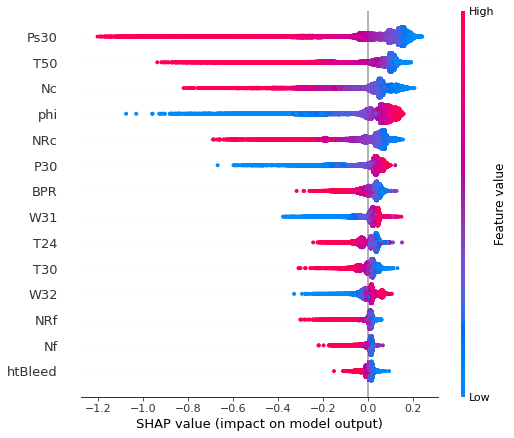

In [ ]:
import shap
shap.initjs()
X = rul_df[features]
shap_values = shap.TreeExplainer(model).shap_values(X)
shap.summary_plot(shap_values, X)
# XAI 코드 복붙 - 전역 해석력
# Ps30 센서가 클수록 (RUL) - 방향으로 기여 = Ps30 센서가 클수록 잔존수명이 낮다.

##### 전체 변수 해석
* Ps30 : HPC 밖으로 나가는 공기 압력이 높을수록 예상 잔존수명 감소.

* P30 : HPC 밖으로 나가는 공기 압력이 낮을수록 예상 잔존수명 감소.

 

* Nc : core(엔진 내부)의 회전 속도가 빠를수록 예상 잔존수명 감소.

* NRc : core(엔진 내부)의 회전 속도가 빠를수록 예상 잔존수명 감소.

 

* T50 : LPT 밖으로 나가는 공기 온도가 높을수록 예상 잔존수명 감소.

* T24 : LPC 밖으로 나가는 공기 온도가 높을수록 예상 잔존수명 감소.

* T30 : HPC 밖으로 나가는 공기 온도가 높을수록 예상 잔존수명 감소.

 

* W31 : HPT 부품으로 들어가는 냉각수의 손실률이 작을수록 예상 잔존수명 감소.

* W32 : LPT 부품으로 들어가는 냉각수의 손실률이 작을수록 예상 잔존수명 감소.

 

* BPR : 전체 공기 양 대비 bypass-duct 로 빠지는 공기의 비율이 클수록 예상 잔존수명 감소.

 

* phi : HPC 로 유입되는 연료의 비율이 작을수록 예상 잔존수명 감소.

### SHAP 을 활용해 상위 4개 변수 선별
##### 잔존수명 적은 방향
* Ps30 - HPC 밖으로 나가는 공기 압력- 높을수록
* Phi - HPC 로 유입되는 연료의 비율 - 낮을수록
* Nc - core(엔진 내부)의 회전 속도 - 높을수록
* T50 - LPT 밖으로 나가는 공기 온도 - 높을수록

### PDP

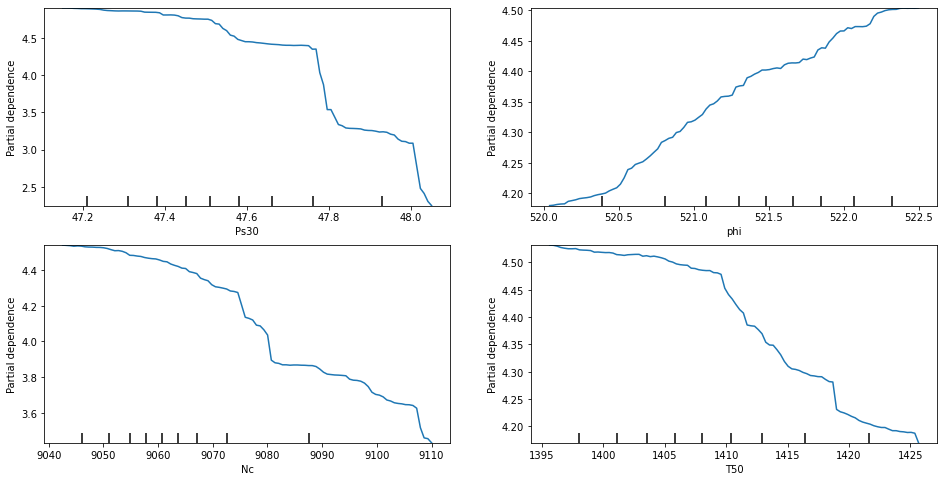

In [ ]:
from sklearn.inspection import plot_partial_dependence as pdp
from sklearn.ensemble import RandomForestRegressor as rf
import matplotlib.pyplot as plt
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(16, 8)
model = rf()
model.fit(X_train, y_train)
pdp(model, rul_df[features], ['Ps30'], ax=ax1)
pdp(model, rul_df[features], ['phi'], ax=ax2)
pdp(model, rul_df[features], ['Nc'], ax=ax3)
pdp(model, rul_df[features], ['T50'], ax=ax4)
# 본래는 XGBoost 로 하려고 했으나, 판다스 상에서 pdp 와 호환성 문제 발생.

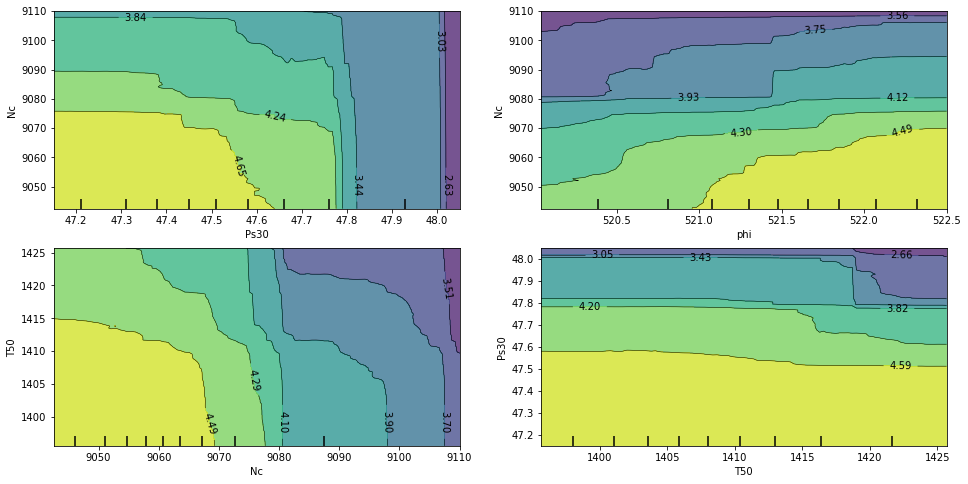

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(16, 8)
pdp(model, rul_df[features], [('Ps30', 'Nc')], ax=ax1)
pdp(model, rul_df[features], [('phi', 'Nc')], ax=ax2)
pdp(model, rul_df[features], [('Nc', 'T50')], ax=ax3)
pdp(model, rul_df[features], [('T50', 'Ps30')], ax=ax4)
# 이 과정도 일종의 SPC 임.
# 공장의 생산과 직접 관련된 건 아니지만, 장비의 상태를 알려주는 현황판.
# 예를 들어, 첫 그래프는 위로 올라가는 것보다 오른쪽으로 이동하는 것이 더 위험함(잔존수명 급락)